# Scenario C - Peak Number Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


## Import local modules

In [15]:
import sys
sys.path.append('../../modules')
import results as res

In [16]:
def heatmap(data, plist, title, color, fsize, fname="./heatmap", precision=".3f"):
    ''' plots a heatmap from numerical data provided in a NxN matrix '''
    
    sns.set(font_scale=1.3)
    
    plt.figure(figsize=fsize)
    plt.title(title)

    yticks = ["m_%dp" % val for _, val in enumerate(plist)]
    xticks = ["d_%dp" % val for _, val in enumerate(plist)]
    
    sns.heatmap(data, annot=True, fmt=precision, linewidths=1, square=True,
                    cmap=color, cbar=False, xticklabels=xticks, yticklabels=yticks)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    
    plt.savefig(fname + '.png', dpi=150)

## Load results and extract convergence information

In [17]:
df = pd.read_csv('./output_5x5/scenario_peaks.csv')
df.index += 1
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,model,peaks
1,1.000000,0.000000,5301.714286,1.070009,0.999757,-4085.145463,0.061835,0.05,2,2
2,1.000000,0.000000,4378.285714,1.067559,0.999885,-4676.334005,0.050792,0.05,2,2
3,1.000000,0.000000,4921.428571,1.044889,0.998888,-3242.184580,0.081070,0.05,2,2
4,1.000000,0.000000,5503.000000,0.998364,0.999471,-4441.461942,0.054944,0.05,2,2
5,1.000000,0.001857,3591.000000,1.041135,0.879129,5393.130267,1.453461,0.05,2,3
...,...,...,...,...,...,...,...,...,...,...
96,1.225263,2.070421,800.578947,0.993634,0.999903,-4697.915666,0.050348,0.05,6,5
97,1.000000,0.000000,4339.315789,1.073274,0.999715,-4076.389080,0.061814,0.05,6,6
98,1.004211,0.027105,1716.684211,0.994462,0.999975,-4715.953621,0.049945,0.05,6,6
99,1.000000,0.000316,3465.842105,0.999609,0.999924,-4683.715310,0.050501,0.05,6,6


In [18]:
# extract the convergence results per model
peaklist = [2,3,4,5,6]
dres = res.get_model_summary(df, peaklist)

In [37]:
# figure size and color mapping
figs=(7,7)

#coolwarm, *bone, gray, binary, BuPu, YlGn, Blues, *Greens, Purples
col = "Greens"
col_r = col + "_r"

## Heatmaps

### WAIC

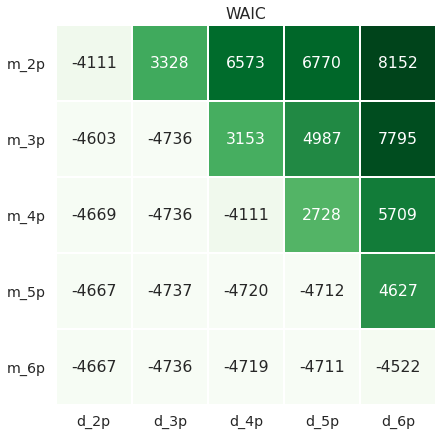

In [38]:
heatmap(dres['waic'], peaklist, "WAIC", col, figs, "hmap_waic", ".0f")

### Rhat

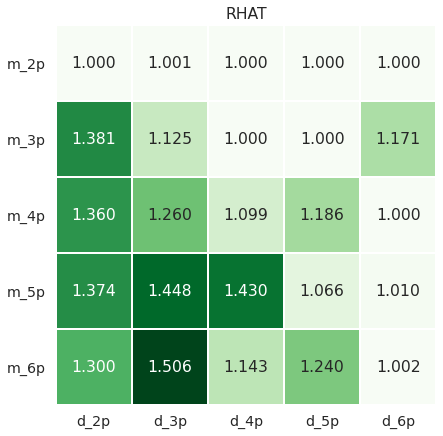

In [39]:
heatmap(dres['rhat'], peaklist, "RHAT", col, figs, "hmap_rhat")

### R2

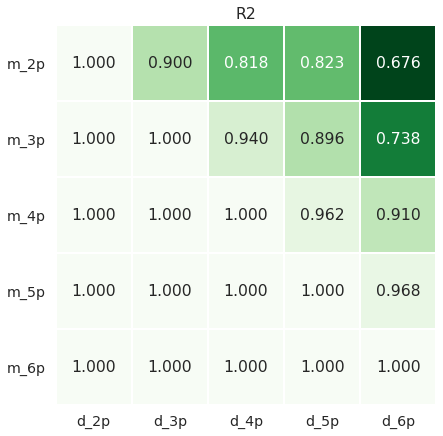

In [40]:
heatmap(dres['r2'], peaklist, "R2", col_r, figs, "hmap_r2")

### BFMI

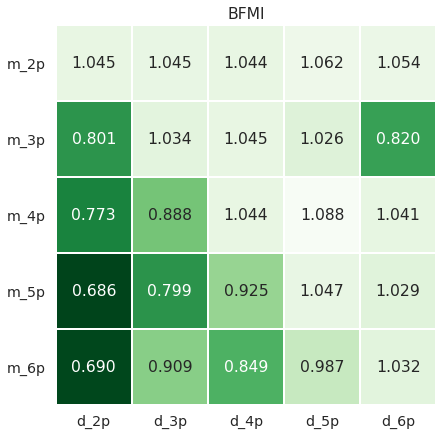

In [41]:
heatmap(dres['bfmi'], peaklist, "BFMI", col_r, figs, "hmap_bfmi")

### MCSE

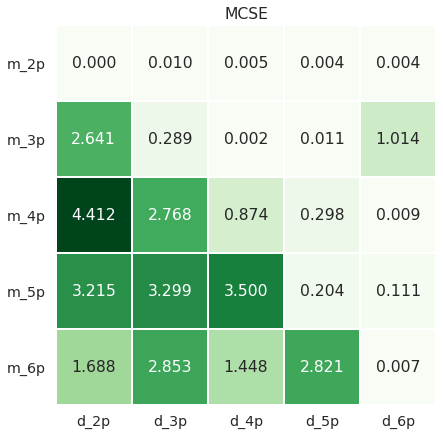

In [42]:
heatmap(dres['mcse'], peaklist, "MCSE", col, figs, "hmap_mcse")

### Noise

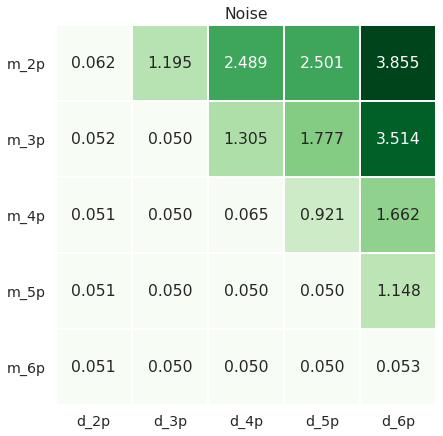

In [43]:
heatmap(dres['noise'], peaklist, "Noise", col, figs, "hmap_noise")

### ESS

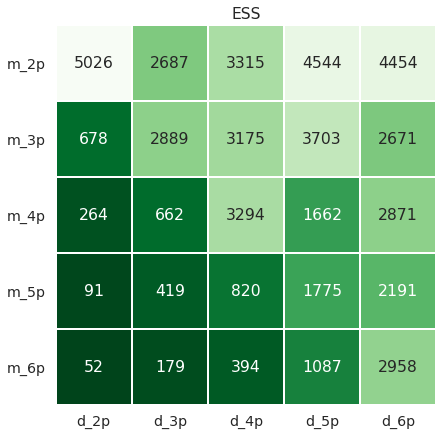

In [44]:
heatmap(dres['ess'], peaklist, "ESS", col_r, figs, "hmap_ess", ".0f")